<img src="../img/Logo.jpg" width="200">

# MasterClass Aprendizaje por Imágenes
# Transferencia de aprendizaje (Modelos pre-entrenados)

### Profesor: Jorge Calvo

## Modelo Vgg16

Imagina que quieres enseñar a una computadora a reconocer diferentes objetos en imágenes, como perros, gatos, coches, etc. Para hacerlo, necesitarías miles y miles de imágenes etiquetadas, es decir, imágenes que ya tienen la información de qué objeto se muestra en cada una.

Entrenar un modelo de reconocimiento de objetos desde cero puede llevar mucho tiempo y recursos computacionales. Aquí es donde entra en juego un modelo preentrenado, como VGG16.

Un modelo preentrenado es un modelo de aprendizaje profundo que ya ha sido entrenado en un conjunto masivo de imágenes. En el caso de VGG16, ha sido entrenado en el conjunto de datos ImageNet (https://www.image-net.org/), que contiene millones de imágenes de diferentes categorías.

Durante el entrenamiento, VGG16 aprendió a reconocer características comunes en las imágenes, como bordes, formas y texturas, y a asociar esas características con las etiquetas de las imágenes. Esto significa que VGG16 ya ha aprendido una representación útil y general de las características visuales en las imágenes.

Cuando utilizas un modelo preentrenado como VGG16, puedes aprovechar ese conocimiento previo para resolver tareas específicas sin tener que entrenar desde cero. En lugar de entrenar todo el modelo, puedes tomar el modelo preentrenado y adaptarlo a tu problema específico.

### Estructura
<img src="../img/vgg.png" width="800">

In [12]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import plot_model
import numpy as np

# Cargar el modelo preentrenado VGG16
model = VGG16(weights='imagenet')

model.summary()



Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

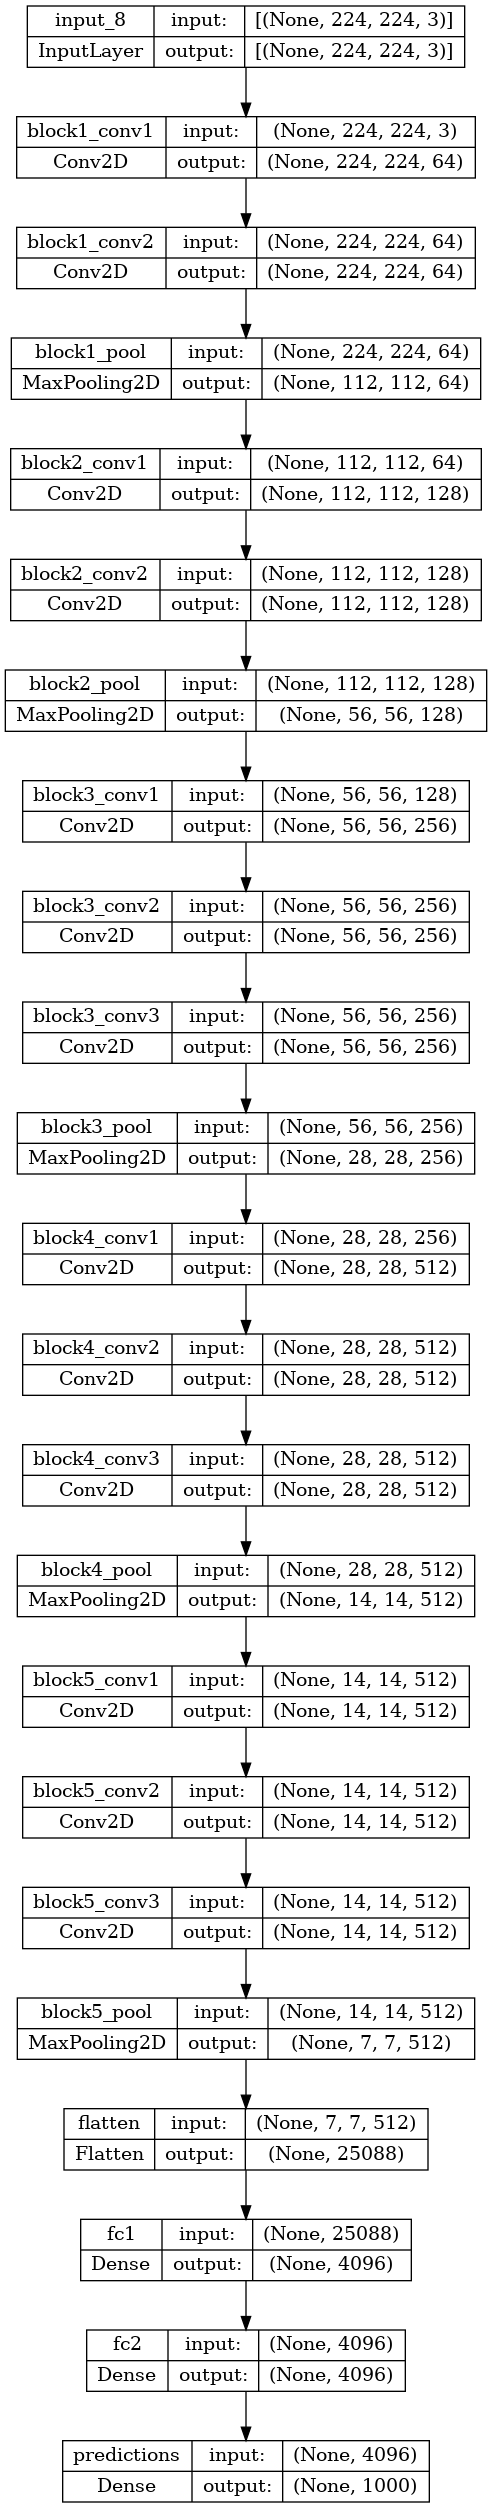

In [10]:
plot_model(model, to_file='./red_convolucional.png', show_shapes=True, show_layer_names=True, dpi=96)

In [13]:
# Cargar y preprocesar una imagen de ejemplo
img_path = '../images/camion.jpg'

#Le damos el tamaño admitido por Vgg16
img = image.load_img(img_path, target_size=(224, 224)) #Cargamos la imagen con el tamaño admitido por vgg16
x = image.img_to_array(img) #Convertimos la imagen en un array
x = np.expand_dims(x, axis=0) #Le añadimos la dimensión del batch
x = preprocess_input(x) #Le pasamos el procesamiento particular de vgg16

print("La imagen tiene la forma ",x.shape)

# Realizar la clasificación de la imagen
predictions = model.predict(x)
#Usamos la propiedad decoded_predictions para obetener la mejor probabilidad
decoded_predictions = decode_predictions(predictions, top=5)[0]

print(decoded_predictions)

La imagen tiene la forma  (1, 224, 224, 3)
1/1 [==============================] - 1s 608ms/step
[('n04467665', 'trailer_truck', 0.9914027), ('n03796401', 'moving_van', 0.0055362033), ('n04461696', 'tow_truck', 0.0008839984), ('n04252225', 'snowplow', 0.0006850954), ('n03417042', 'garbage_truck', 0.0003980353)]


In [19]:
# Imprimir las predicciones
for pred in decoded_predictions:
    print(f"{pred[1]}: {pred[2]*100:.2f}%")

trailer_truck: 99.14%
moving_van: 0.55%
tow_truck: 0.09%
snowplow: 0.07%
garbage_truck: 0.04%


## Las activaciones de cada capa convolucional 

1/1 [==============================] - 0s 205ms/step


/tmp/ipykernel_13173/745095389.py:28: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()


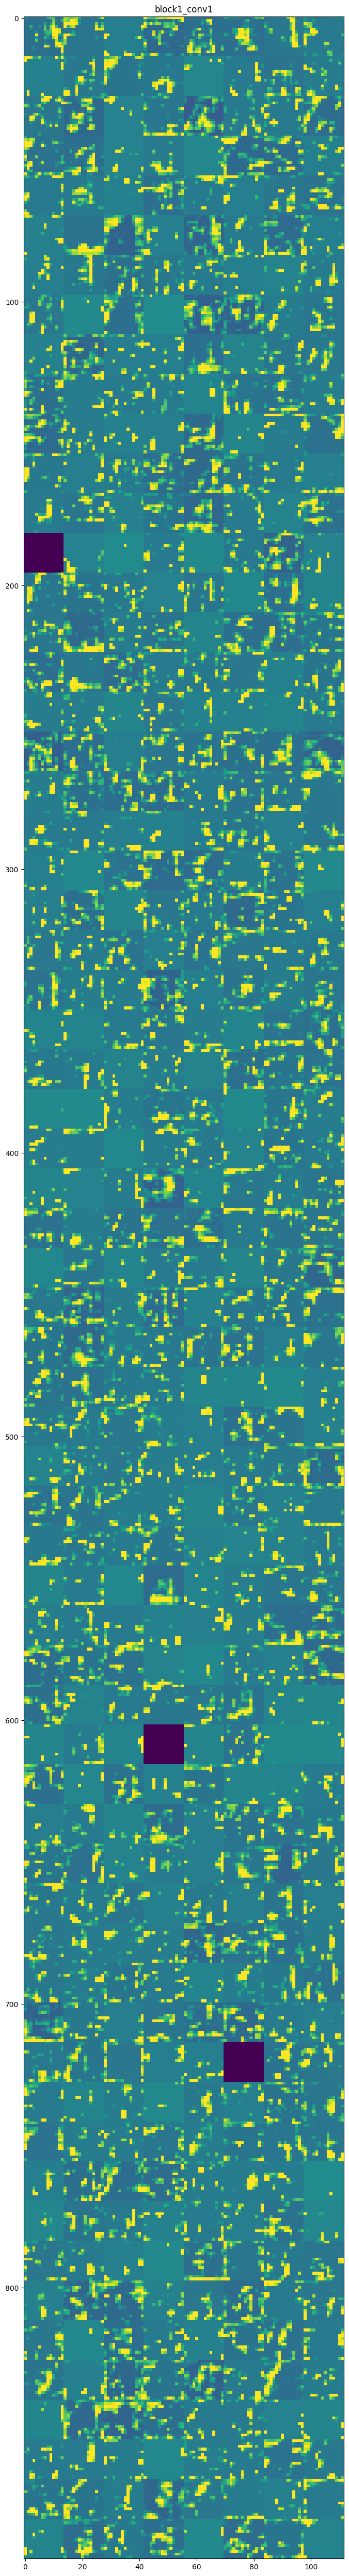

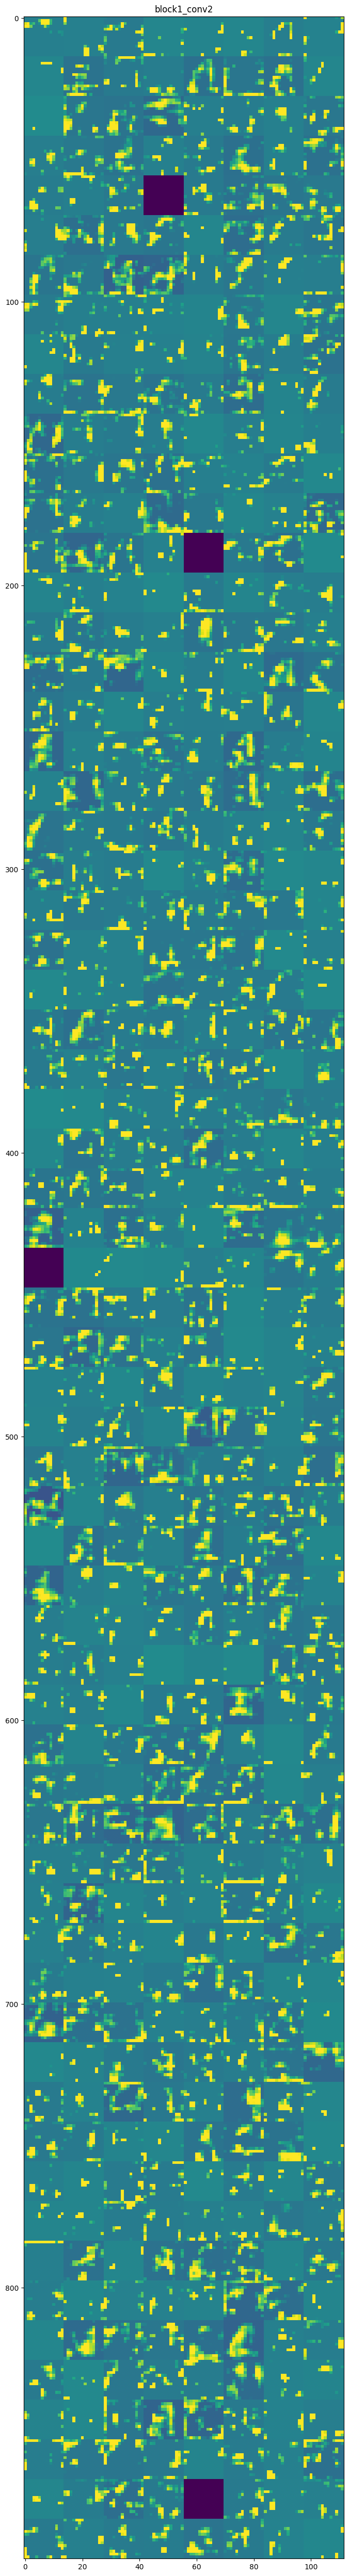

In [26]:
# Obtener las salidas de las diferentes capas por orden
layer_outputs = [layer.output for layer in model.layers[1:19]]  # Capas convolucionales hasta block4_pool
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)


# Visualizar las salidas de las capas por nombres
selected_layers = ['block5_conv1', 'block5_conv2']
layer_outputs = [model.get_layer(layer_name).output for layer_name in selected_layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)


activations = activation_model.predict(x)

images_per_row = 8

for layer_name, layer_activation in zip(layer_names, activations):
    num_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]

    # Crear una cuadrícula de imágenes para visualizar las activaciones
    rows = num_features // images_per_row
    display_grid = np.zeros((size * rows, images_per_row * size))

    for row in range(rows):
        for col in range(images_per_row):
            channel_image = layer_activation[0, :, :, row * images_per_row + col]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[row * size: (row + 1) * size, col * size: (col + 1) * size] = channel_image

    # Mostrar las activaciones de la capa
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.show()


## Inception V3

In [2]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

# Cargar el modelo preentrenado InceptionV3
model = InceptionV3(weights='imagenet')

# Cargar y preprocesar una imagen de ejemplo
img_path = '../images/camion.jpg'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


print("La imagen tiene la forma ",x.shape)

# Realizar la clasificación de la imagen
predictions = model.predict(x)
decoded_predictions = decode_predictions(predictions, top=3)[0]

# Imprimir las predicciones
for pred in decoded_predictions:
    print(f"{pred[1]}: {pred[2]*100:.2f}%")


La imagen tiene la forma  (1, 299, 299, 3)
1/1 [==============================] - 2s 2s/step
trailer_truck: 75.95%
moving_van: 1.74%
tow_truck: 0.53%
